<a href="https://colab.research.google.com/github/WillHK/LambdaUnit1DSProject/blob/master/WillHaeckSprint1Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seattle Police Department use of force and racial bias analysis
##Sources
Timeline of the Seattle PD Department of Justice intervention:

https://www.seattletimes.com/seattle-news/crime/timeline-of-seattle-police-reform/


In [0]:
# Imports
import pandas as pd
import numpy as np


In [2]:
# Matplotlib basemap
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
     | 133.2MB 70.5MB/s
  Stored in directory: /tmp/pip-ephem-wheel-cache-c46r9ts3/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [3]:
# Socrata API
!pip install sodapy
from sodapy import Socrata


In [4]:
 client = Socrata("data.seattle.gov/", app_token="")

In [5]:
# Stops reported under the Terry v Ohio ruling
# Includes beat so it can be mapped roughly and placed in the appropriate precinct
terry_stops = client.get("28ny-9ts8")
terry_stop_df = pd.DataFrame.from_dict(terry_stops)
terry_stop_df.head()

,arrestflag,beat,calltype,finalcalltype,friskflag,go_num,initialcalltype,officer_gender,officer_race,officer_yob,officerid,officersquad,precinct,reported_date,reported_time,resolution,sector,subjectagegroup,subjectgender,subjectid,subjectrace,terry_stop_id,weapon_type
0,N,E2,911,--DISTURBANCE - FIGHT,N,20150000119975,FIGHT - IP - PHYSICAL (NO WEAPONS),M,White,1991,1793,NULL,East,2015-04-12,22:46:00.0000000,-,E,26 - 35,Male,NULL,White,11684,None
1,N,NULL,NULL,NULL,-,20150000002346,NULL,M,White,1977,1735,EAST PCT 1ST W - E/G RELIEF (CHARLIE),NULL,2015-05-20,10:33:00.0000000,-,NULL,26 - 35,-,NULL,Black,10675,None
2,N,E2,ONVIEW,--WARRANT SERVICES - FELONY,N,20150000088359,WARRANT - FELONY PICKUP,M,White,1977,1735,NULL,East,2015-03-18,09:58:00.0000000,-,E,36 - 45,Male,NULL,Black,10012,None
3,N,R3,911,--ROBBERY - STRONG ARM,N,20150000202641,ROBBERY - IP/JO (INCLUDES STRONG ARM),M,Hispanic or Latino,1971,1128,SOUTH PCT 1ST W - ROBERT,South,2015-06-16,18:23:00.0000000,-,R,18 - 25,Male,NULL,Black,11662,None
4,N,C3,911,--HOMICIDE,N,20150000224628,ASLT - IP/JO - PERSON SHOT OR SHOT AT,M,White,1980,1690,EAST PCT 2ND W - BEATS,East,2015-07-02,19:39:00.0000000,-,C,46 - 55,Male,NULL,Black,12260,None


In [6]:
# Officer involved shootings, includes lat and lon so it can be mapped
officer_involved_shootings = client.get("mg5r-efcm")
ois_df = pd.DataFrame.from_dict(officer_involved_shootings)
ois_df.head()

,blurred_address,city,date,fatal,frb,go,justified,justified_policy,latitude,longitude,number_of_rounds,officer_disciplined,officer_gender,officer_injured,officer_race,on_duty,rank,state,subject_age,subject_dob,subject_gender,subject_race,subject_weapon,summary,time,type_of_weapon,within_policy,years_of_spd_service
0,65XX BLOCK OF RAINIER AV S,Seattle,2005-03-21T00:00:00.000,Yes,FRB 05-01,05-118193,Missing,Missing,47.54381502,-122.2737411,1,Missing,Male,No,White,Yes,Officer,WA,29,11/3/1975,Male,Asian,Yes,"On March 21st, 2005, at approximately 5:20 P.M...",1828,Knife,NaN,20
1,65XX BLOCK OF 1 AV S,Seattle,2005-04-29T00:00:00.000,Yes,FRB 05-03,05-174022,Yes,Justified,47.54417731,-122.3345125,2,No,Male,No,White,Yes,Officer,WA,36,8/2/1969,Male,White,No,"On April 29th, 2005, at approximately 3:35 A.M...",0330,N/A,NaN,5
2,7XX BLOCK OF STEWART ST,Seattle,2005-06-20T00:00:00.000,Yes,FRB 05-04,05-256303,Yes,Justified,47.61462023,-122.3357251,1,No,Male,No,White,Yes,Officer,WA,53,11/15/1952,Male,White,Yes,"On June 20th, 2005, at approximately 11:30 A.M...",1130,"Grenade, backpack reported to have explosives",NaN,15
3,7XX BLOCK OF STEWART ST,Seattle,2005-06-20T00:00:00.000,Yes,FRB 05-04,05-256303,Yes,Justified,47.61462023,-122.3357251,1,No,Male,No,White,Yes,Officer,WA,53,11/15/1952,Male,White,Yes,"On June 20th, 2005, at approximately 11:30 A.M...",1130,"Grenade, backpack reported to have explosives",NaN,18
4,16 AV / E UNION ST,Seattle,2005-07-08T00:00:00.000,No,FRB 05-05,05-286240,Yes,Justified,47.61290843,-122.3114744,1,No,Male,Yes,White,Yes,Officer,WA,48,1/28/1957,Male,Black,Yes,"On July 8th, 2005, at approximately 1:45 P.M.,...",1348,Screwdriver,NaN,4


In [7]:
# Precinct and beat location center points, I'll need to organize this
# so beats are classified under their precinct.
# A dataset of the beat outlines would be good, I'll look for that
precinct_centerpoints = client.get("4khs-fz35")
pc_df = pd.DataFrame.from_dict(precinct_centerpoints)
pc_df['latitude'] = pd.to_numeric(pc_df['latitude'])
pc_df['longitude'] = pd.to_numeric(pc_df['longitude'])

pc_df.dtypes
# pc_df.head(100)

:@computed_region_2day_rhn5     object
:@computed_region_cyqu_gs94     object
:@computed_region_kuhn_3gp2     object
:@computed_region_q256_3sug     object
:@computed_region_ru88_fbhk     object
beat_name                       object
latitude                       float64
location_1                      object
longitude                      float64
dtype: object

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=380463.34254564694,56823.4715542678,394429.04176870215,78792.15755500927&bboxSR=32148&imageSR=32148&size=2000,3146&dpi=96&format=png32&transparent=true&f=image


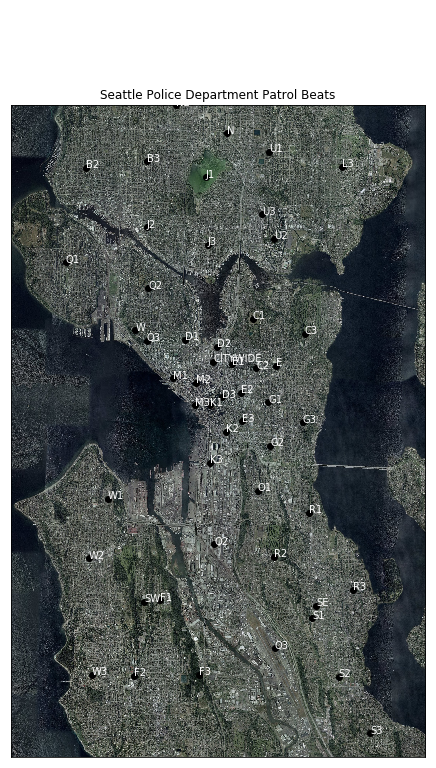

In [8]:
# Draw map of Seattle 47.515961, -122.424454 47°44'04.6"N 122°14'25.8"W

fig = plt.figure(figsize=(16,12))

m = Basemap(llcrnrlon=-122.42,llcrnrlat=47.5,urcrnrlon=-122.24,urcrnrlat=47.7, epsg=32148)
plt.title('Seattle Police Department Patrol Beats')
# map.bluemarble(scale=2)
# map.etopo(scale=1, alpha=1)
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels=2000, verbose=True)
fig.get_axes()[0].spines['top'].set_visible(True)
fig.get_axes()[0].spines['right'].set_visible(True)
# map.drawcoastlines()
# map.drawrivers()
# map.drawcounties()
# map.fillcontinents(color='red',lake_color='aqua')
beat_x, beat_y = m(pc_df['longitude'].values, pc_df['latitude'].values)
labels = pc_df['beat_name']
m.scatter(beat_x, beat_y, marker='o', color='black')
for i, txt in enumerate(labels):
  plt.annotate(txt, xy=(beat_x[i], beat_y[i]), color='white')
plt.show()